**Enter your ID here**

**2125051097**

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Mount drive and load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 Data Visualization

In [8]:
# Task 1.1
data = pd.read_csv("/content/drive/MyDrive/Autumn 2024/Machine Learning/LAbtest/dataset_7.csv")
data.head()

,age,gender,symptom_fever,symptom_cough,symptom_fatigue,diagnosis,treatment,recovery_days,hospital_visits,region,class_label
0,0.0,Male,No,No,Yes,Flu,Rest,6.0,0.0,Urban,Severe
1,72.0,Other,Yes,Yes,No,Flu,Rest,13.0,0.0,Urban,Mild
2,36.0,Other,Yes,NaN,No,COVID-19,NaN,21.0,4.0,Urban,Mild
3,38.0,Other,Yes,No,Yes,Flu,NaN,21.0,0.0,Rural,Mild
4,63.0,Male,No,No,No,COVID-19,NaN,2.0,1.0,Urban,Moderate


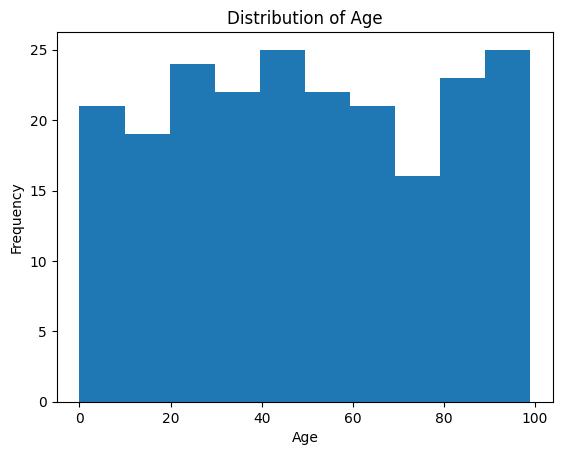

In [9]:
# Task 1.2
import matplotlib.pyplot as plt


plt.hist(data['age'], bins=10)  # Adjust 'bins' for desired granularity
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

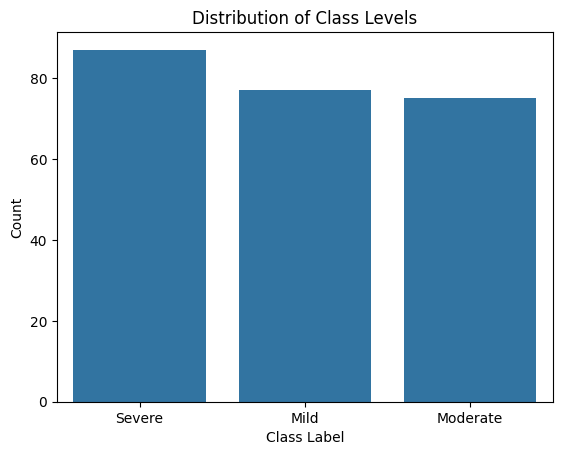

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='class_label', data=data)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Levels')
plt.show()

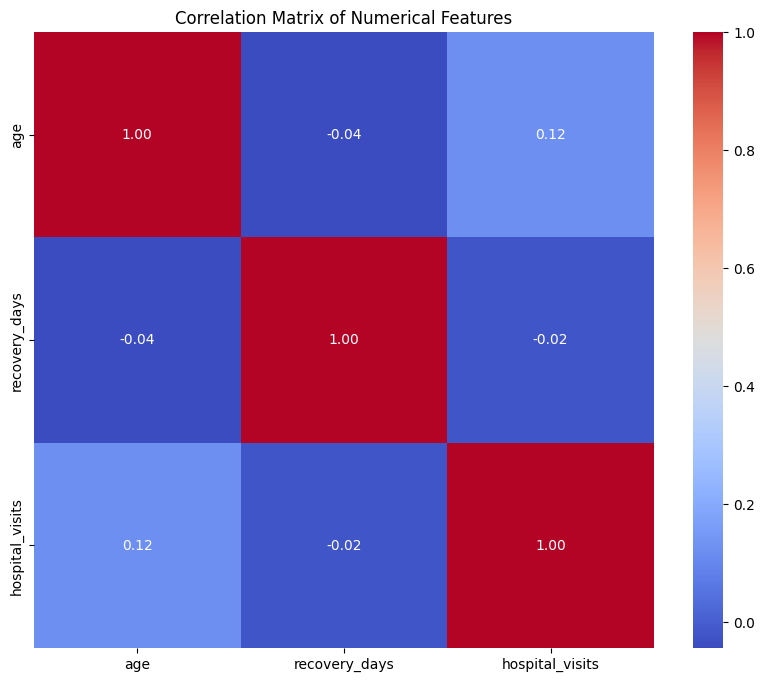

In [14]:
# Task 1.4
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'data'
numerical_features = data.select_dtypes(include=['number'])  # Select numerical columns
correlation_matrix = numerical_features.corr()  # Calculate correlation matrix

plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2 Data Preprocessing

In [16]:
# Task 2.1
import pandas as pd
from sklearn.impute import SimpleImputer



# 1. Identify missing values:
print(data.isnull().sum())  # Shows the number of missing values in each column

# 2. Imputation:
# For numerical features, use mean or median imputation:
numerical_features = data.select_dtypes(include=['number'])
imputer_numerical = SimpleImputer(strategy='mean')  # Or strategy='median'
data[numerical_features.columns] = imputer_numerical.fit_transform(numerical_features)

# For categorical features, use most frequent value imputation:
categorical_features = data.select_dtypes(include=['object'])  # Assuming object type for categorical
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_features.columns] = imputer_categorical.fit_transform(categorical_features)

# 3. Verify imputation:
print(data.isnull().sum())  # Should now show 0 missing values in all columns

age                21
gender             24
symptom_fever      23
symptom_cough      28
symptom_fatigue    27
diagnosis          27
treatment          70
recovery_days      24
hospital_visits    25
region             24
class_label         0
dtype: int64
age                0
gender             0
symptom_fever      0
symptom_cough      0
symptom_fatigue    0
diagnosis          0
treatment          0
recovery_days      0
hospital_visits    0
region             0
class_label        0
dtype: int64


In [19]:
# Task 2.2
from sklearn.preprocessing import MinMaxScaler


numerical_features = ['age', 'recovery_days']  # Features to normalize

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Verify the normalization
print(data[numerical_features].describe()) # Check min and max values (should be 0 and 1)

              age  recovery_days
count  239.000000     239.000000
mean     0.502687       0.501329
std      0.277669       0.284414
min      0.000000       0.000000
25%      0.282828       0.285714
50%      0.502687       0.501329
75%      0.732323       0.750000
max      1.000000       1.000000


In [20]:
# Task 2.3
import pandas as pd

# Assuming your DataFrame is named 'data'

# Create age bins using pd.cut
data['age_bins'] = pd.cut(data['age'], bins=5, labels=['Very Young', 'Young', 'Middle-Aged', 'Senior', 'Very Senior'])

# Verify the new feature
print(data[['age', 'age_bins']].head())


        age    age_bins
0  0.000000  Very Young
1  0.727273      Senior
2  0.363636       Young
3  0.383838       Young
4  0.636364      Senior


# 3 Classification

In [24]:
# Task 3.1
features = data.columns[:7]
feature_vector = data[features]

print(feature_vector.head())

        age gender symptom_fever symptom_cough symptom_fatigue diagnosis  \
0  0.000000   Male            No            No             Yes       Flu   
1  0.727273  Other           Yes           Yes              No       Flu   
2  0.363636  Other           Yes            No              No  COVID-19   
3  0.383838  Other           Yes            No             Yes       Flu   
4  0.636364   Male            No            No              No  COVID-19   

  treatment  
0      Rest  
1      Rest  
2      Rest  
3      Rest  
4      Rest  


In [27]:
# Task 3.2
from sklearn.model_selection import train_test_split



# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_vector, data['class_label'], test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (191, 7)
X_test shape: (48, 7)
y_train shape: (191,)
y_test shape: (48,)


In [35]:
# Task 3.3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files

uploaded = files.upload()  # Upload file
data = pd.read_csv(list(uploaded.keys())[0])


# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Autumn 2024/Machine Learning/LAbtest/dataset_7.csv')

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

# Split features and target
target = 'class_label'
X = data_imputed.drop(columns=[target])
y = data_imputed[target]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier()
}

# Evaluate classifiers
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


Saving dataset_7.csv to dataset_7.csv
            Classifier  Accuracy  Precision    Recall
0  Logistic Regression  0.291667   0.343981  0.291667
1        Decision Tree  0.395833   0.523722  0.395833
2        Random Forest  0.312500   0.359375  0.312500
3                  SVM  0.375000   0.415479  0.375000
4                 k-NN  0.312500   0.439931  0.312500


            Classifier  Accuracy  Precision    Recall
0  Logistic Regression  0.291667   0.343981  0.291667
1        Decision Tree  0.395833   0.497222  0.395833
2        Random Forest  0.395833   0.431548  0.395833
3                  SVM  0.375000   0.415479  0.375000
4                 k-NN  0.312500   0.439931  0.312500


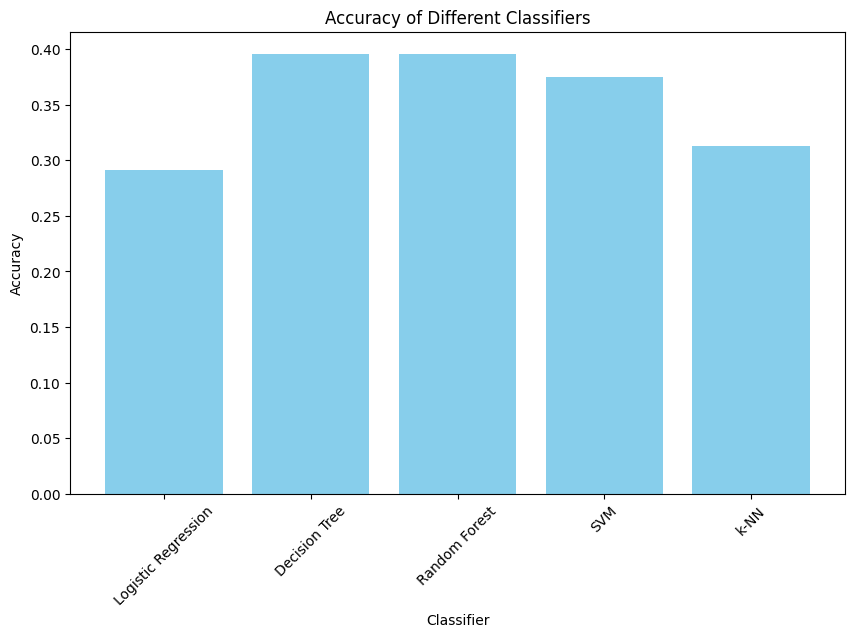

In [36]:
# Task 3.4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/dataset_7.csv')

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

# Split features and target
target = 'class_label'
X = data_imputed.drop(columns=[target])
y = data_imputed[target]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier()
}

# Evaluate classifiers
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(results_df['Classifier'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.show()


# 4 Clustering

In [ ]:
# Task 4.1

In [ ]:
# Task 4.2

# 5 Neural Network

In [ ]:
# Task 5.1

In [ ]:
# Task 5.2

In [ ]:
# Task 5.3

In [ ]:
# Task 5.4